In [327]:
# Utilizzare NumPy per generare una serie temporale
# di 305 giorni di dati, simulando il numero di visitatori giornalieri in
# un ospedale. Assumere che il numero medio di visitatori sia 1200 con una
# deviazione standard di 900. Inoltre, aggiungere un trend decrescente nel
# tempo per simulare l'aumento della popolarità del parco.

In [328]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [329]:
#Dati iniziali
giorni = 365
media_visitatori = 1200
deviazione_standard = 900


In [330]:
#Serie temporale dei visitatori
visitatori_giornalieri = np.random.normal(loc = media_visitatori, scale = deviazione_standard, size = giorni).astype(int)
visitatori_giornalieri = np.maximum(0, visitatori_giornalieri)

In [331]:
#Aggiunta trend decrescente
trend_decrescente = np.linspace(0, -300, giorni).astype(int)
visitatori_con_trend = visitatori_giornalieri + trend_decrescente
visitatori_con_trend = np.maximum(0, visitatori_con_trend)

In [ ]:
print(visitatori_giornalieri)


In [ ]:
print(visitatori_con_trend)

In [334]:
# Creare un DataFrame pandas con le date come
# indice e il numero di visitatori come colonna e una collonna casuale
# della patologia scelta fra 3(ossa, cuore, testa ).

In [335]:
#colonna date 
date = pd.date_range(start="2023-01-01", periods=giorni, freq="D")

#colonna patologie
patologie = np.random.choice(["ossa", "cuore", "testa"], size=giorni)

In [336]:
#Creazione DataFrame
df = pd.DataFrame(index = date, data={'Visitatori': visitatori_con_trend, 'Patologia': patologie})

#Imposto il valore none alla colonna patologie per le righe con zero visitatori
df.loc[df['Visitatori'] == 0, 'Patologia'] = None

In [337]:
#Visualizzo il DataFrame
df

,Visitatori,Patologia
2023-01-01,2159,ossa
2023-01-02,1302,ossa
2023-01-03,1320,ossa
2023-01-04,1500,testa
2023-01-05,27,testa
...,...,...
2023-12-27,987,ossa
2023-12-28,905,cuore
2023-12-29,1263,ossa
2023-12-30,1943,testa


In [338]:
#Calcolare il numero medio di visitatori per mese e la
#deviazione standard e quale patologia è più e quale meno trovata.

In [339]:
def media_visitatori(df):
    media = df['Visitatori'].mean()
    return media


def media_mensile(df):
    media_mensile = df.groupby(df.index.month)["Visitatori"].mean()
    return media_mensile

print("Media totale: ",media_visitatori(df))

print("Media mensile: ", media_mensile(df))

Media totale:  1023.2109589041096
Media mensile:  1     1327.483871
2      995.964286
3      913.677419
4     1070.100000
5     1099.903226
6      908.233333
7     1036.935484
8      948.677419
9      964.966667
10    1201.419355
11     892.266667
12     907.967742
Name: Visitatori, dtype: float64


In [340]:
def deviazione_standard(df):
    deviazione_standard = df['Visitatori'].std()
    return deviazione_standard

def deviazione_standard_mensile(df):
    deviazione_standard_mensile = df.groupby(df.index.month)['Visitatori'].std()
    return deviazione_standard_mensile

print("Deviazione standard totale: ",deviazione_standard(df))
print("Deviazione standard mensile: ", deviazione_standard_mensile(df))


Deviazione standard totale:  794.9993931094587
Deviazione standard mensile:  1      668.365014
2      724.004066
3      711.443480
4      843.104008
5      839.449834
6      612.908593
7      927.425395
8      726.596375
9     1004.544793
10     802.800755
11     879.432299
12     728.063893
Name: Visitatori, dtype: float64


In [341]:
#Patologia più e meno trovata
def patologia_piu_trovata(df):
    patologia_piu_trovata = df['Patologia'].value_counts().idxmax()
    return patologia_piu_trovata

def patologia_meno_trovata(df):
    patologia_meno_trovata = df['Patologia'].value_counts().idxmin()
    return patologia_meno_trovata


print("La patologia più trovata è ",patologia_piu_trovata(df))

print("La patologia meno trovata è", patologia_meno_trovata(df))

La patologia più trovata è  testa
La patologia meno trovata è ossa


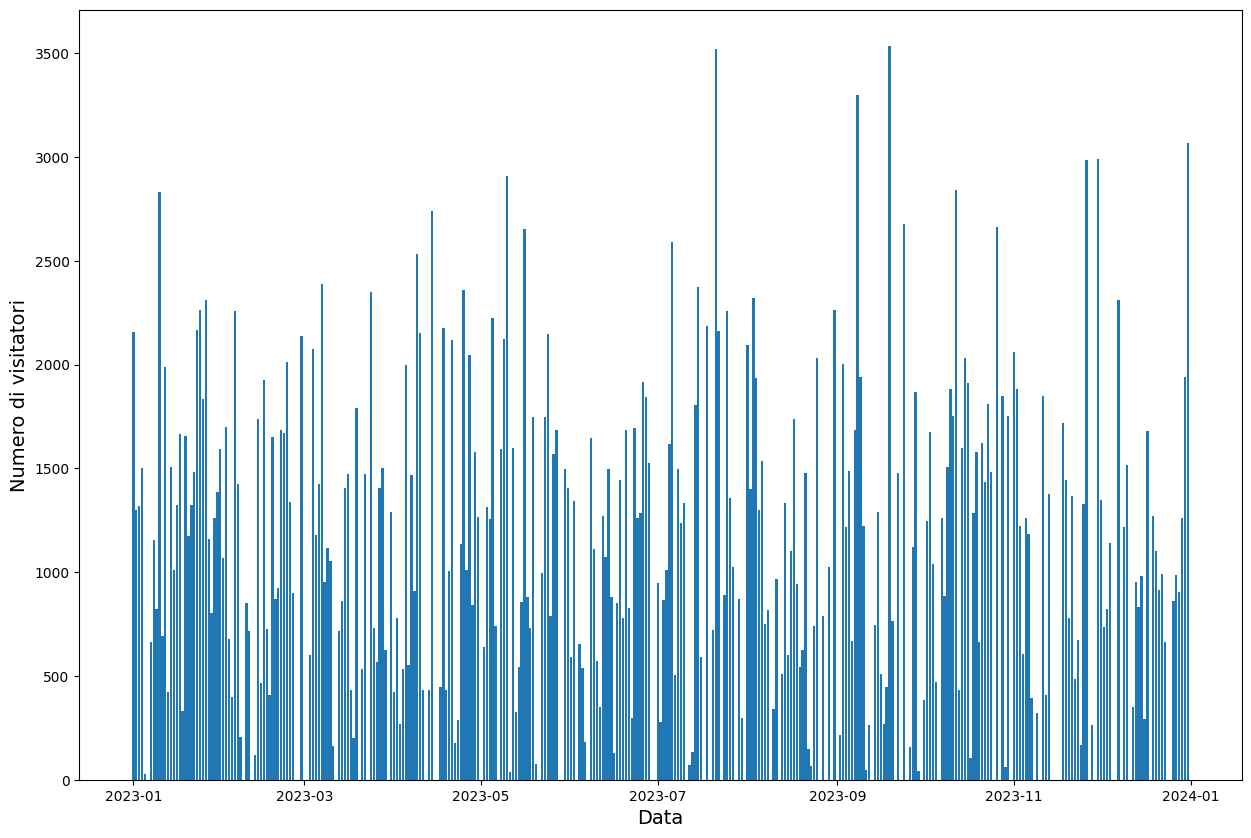

In [342]:
#Grafico a linee per il numero di vistatori giornaliero
plt.figure(figsize=(15,10))
plt.bar(df.index,df["Visitatori"], label = 'Visitatori totali per giorno')
plt.xlabel('Data', fontsize=14)
plt.ylabel('Numero di visitatori', fontsize= 14)
plt.show()

In [343]:
#media mensile del numero di visitatori
media_mensile = df.groupby(df.index.month)["Visitatori"].mean()

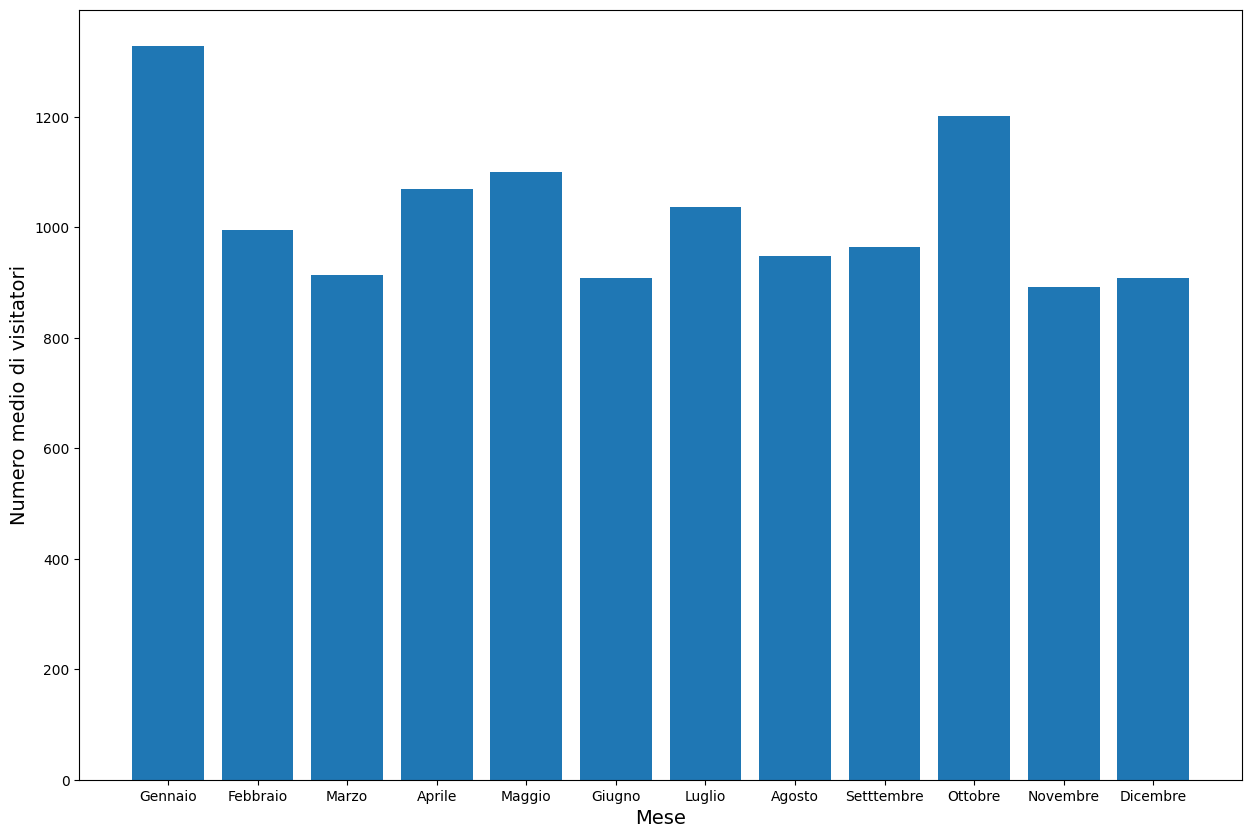

In [344]:
plt.figure(figsize=(15,10))
plt.bar(media_mensile.index, media_mensile, label = 'Media mensile dei visitatori')
plt.xlabel('Mese', fontsize=14)
plt.ylabel('Numero medio di visitatori', fontsize= 14)
plt.xticks(np.arange(1, 13), ["Gennaio", "Febbraio", "Marzo", "Aprile", "Maggio", "Giugno", "Luglio", "Agosto", "Setttembre","Ottobre","Novembre","Dicembre"])
plt.show()

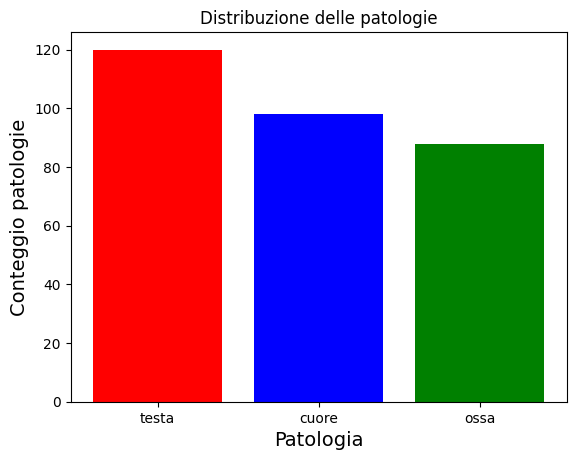

In [345]:
#Grafico per le tre patologie

#Conto ciascuna patologia
conteggio_patologie = df["Patologia"].value_counts()

#print(conteggio_patologie)


plt.bar(conteggio_patologie.index, conteggio_patologie.values, color=['red', 'blue', 'green'])


plt.xlabel('Patologia', fontsize=14)
plt.ylabel('Conteggio patologie', fontsize= 14)
plt.title('Distribuzione delle patologie')
plt.xticks(rotation = 0)
plt.show()